In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import os
import sys

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('D:/time_serie_forecast/src'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
df_train = pd.read_csv('D:/time_serie_forecast/data/train.csv')

## 📊 EDA (Exploratory Data Analysis)

#### Step 1 - Check the statistics

In [3]:
df_train.head(2)

,id,date,country,store,product,num_sold
0,0,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Improve Your Coding,63
1,1,2017-01-01,Argentina,Kaggle Learn,Using LLMs to Train More LLMs,66


In [4]:
df_train['date'] = pd.to_datetime(df_train['date'])
df_train.shape

(136950, 6)

In [5]:
print(min(df_train['date']))
print(max(df_train['date']))

2017-01-01 00:00:00
2021-12-31 00:00:00


In [14]:
countries = df_train['country'].unique()
stores = df_train['store'].unique()
products = df_train['product'].unique()

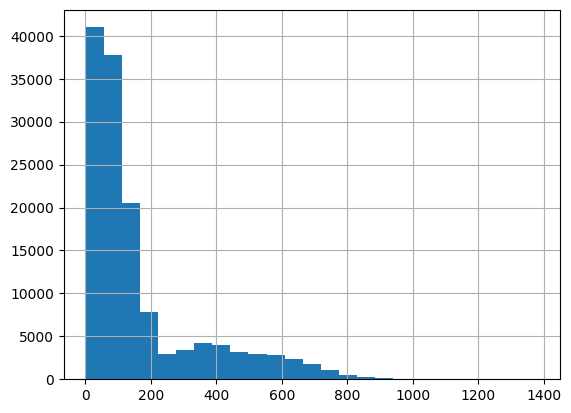

In [29]:
df_train.num_sold.hist(bins=25)
plt.show()

In [7]:
df_train['country'].value_counts().reset_index()

,country,count
0,Argentina,27390
1,Canada,27390
2,Estonia,27390
3,Japan,27390
4,Spain,27390


In [8]:
df_train['store'].value_counts().reset_index()

,store,count
0,Kaggle Learn,45650
1,Kaggle Store,45650
2,Kagglazon,45650


In [9]:
df_train['product'].value_counts().reset_index()

,product,count
0,Using LLMs to Improve Your Coding,27390
1,Using LLMs to Train More LLMs,27390
2,Using LLMs to Win Friends and Influence People,27390
3,Using LLMs to Win More Kaggle Competitions,27390
4,Using LLMs to Write Better,27390


In [11]:
df_train.dtypes.reset_index()

,index,0
0,id,int64
1,date,datetime64[ns]
2,country,object
3,store,object
4,product,object
5,num_sold,int64


In [12]:
df_train.isna().mean().reset_index()

,index,0
0,id,0.0
1,date,0.0
2,country,0.0
3,store,0.0
4,product,0.0
5,num_sold,0.0


### Data Summary

**Missing Values**:  
All columns are complete with no missing data (0% missing). Every column has data for all rows.

**Country**:  
The dataset includes data from five different countries.

**Store**:  
Sales data comes from three unique Kaggle-branded stores.

**Product**:  
There are five distinct products available for sale.

#### Step 2 - Visualization

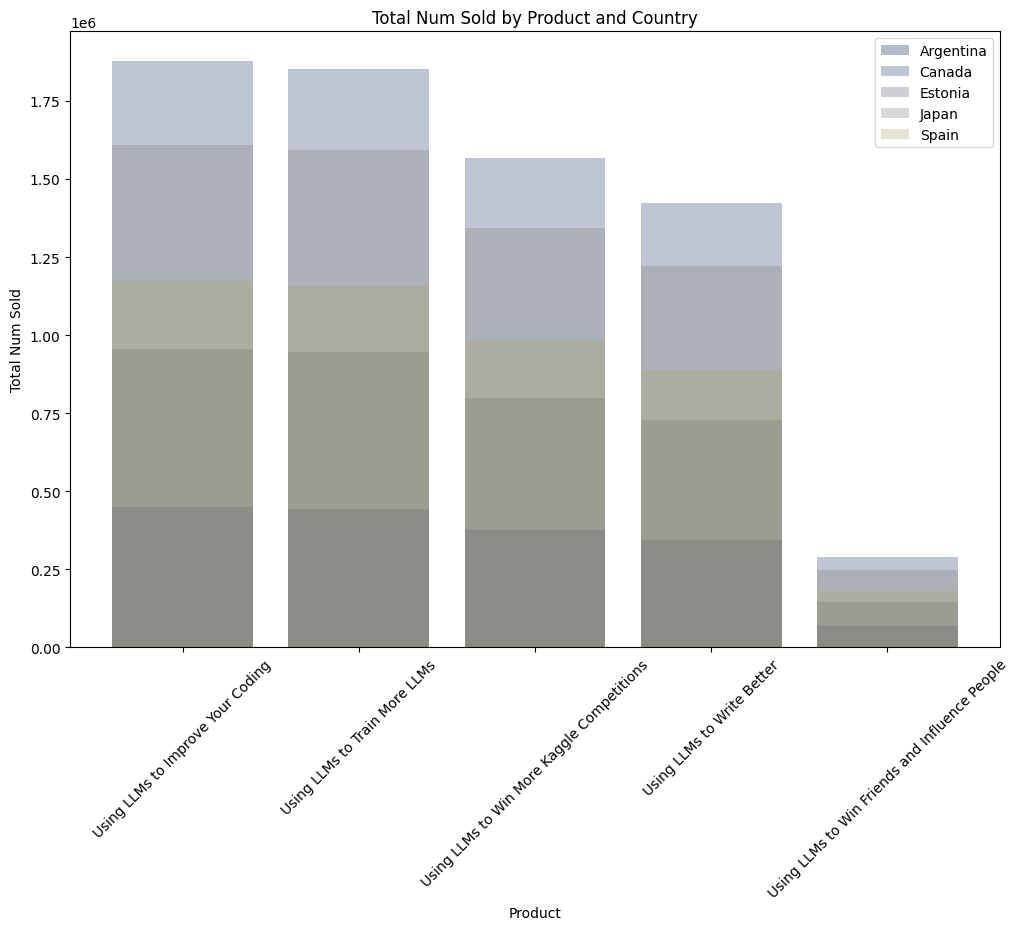

In [13]:
agg_num_sold = df_train.groupby(['country', 'product']).num_sold.sum().reset_index()
agg_num_sold = agg_num_sold.sort_values(['num_sold', 'product'], ascending=False)

colors = plt.cm.cividis(np.linspace(0, .7, len(countries)))
plt.figure(figsize=(12, 8))

for i, country in enumerate(countries):
    subset = agg_num_sold[agg_num_sold['country'] == country]
    plt.bar(subset['product'], 
            subset['num_sold'], 
            alpha=0.3, 
            color=colors[i], 
            label=country)

plt.title('Total Num Sold by Product and Country')
plt.xlabel('Product')
plt.ylabel('Total Num Sold')
plt.xticks(rotation=45)
plt.legend()

plt.show()

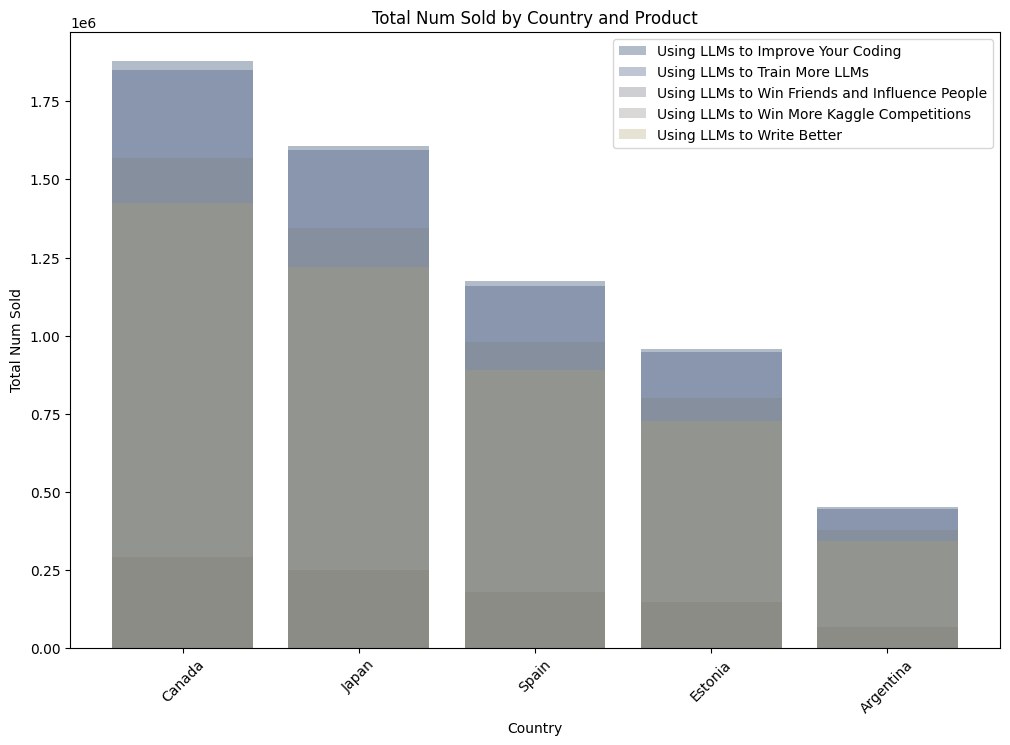

In [14]:
agg_num_sold = df_train.groupby(['country', 'product']).num_sold.sum().reset_index()
agg_num_sold = agg_num_sold.sort_values(['num_sold', 'product'], ascending=False)

colors = plt.cm.cividis(np.linspace(0, .7, len(products)))
plt.figure(figsize=(12, 8))

for i, product in enumerate(products):
    subset = agg_num_sold[agg_num_sold['product'] == product]
    plt.bar(subset['country'], 
            subset['num_sold'], 
            alpha=0.3, 
            color=colors[i], 
            label=product)

plt.title('Total Num Sold by Country and Product')
plt.xlabel('Country')
plt.ylabel('Total Num Sold')
plt.xticks(rotation=45)
plt.legend()

plt.show()

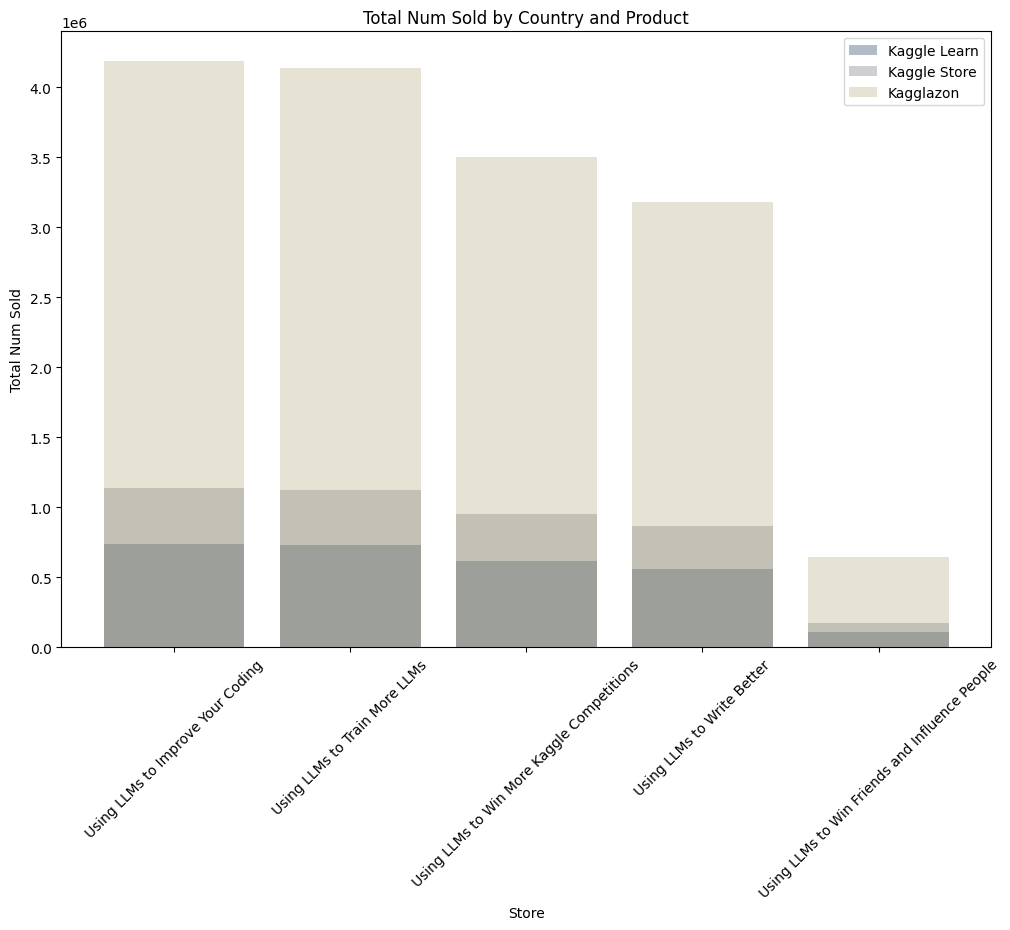

In [15]:
agg_num_sold = df_train.groupby(['store', 'product']).num_sold.sum().reset_index()
agg_num_sold = agg_num_sold.sort_values(['num_sold', 'product'], ascending=False)

colors = plt.cm.cividis(np.linspace(0, .7, len(stores)))
plt.figure(figsize=(12, 8))

for i, store in enumerate(stores):
    subset = agg_num_sold[agg_num_sold['store'] == store]
    plt.bar(subset['product'], 
            subset['num_sold'], 
            alpha=0.3,
            color=colors[i], 
            label=store)

plt.title('Total Num Sold by Country and Product')
plt.xlabel('Store')
plt.ylabel('Total Num Sold')
plt.xticks(rotation=45)
plt.legend()

plt.show()

**Histogram Insights**:

> **Key Observation:**  
> An in-depth analysis of the histogram displaying total sales by product reveals a striking consistency in sales patterns across various countries.  
> 
> The distribution of sales for each product remains remarkably similar regardless of the country, suggesting a uniformity in product preference and performance on a global scale.  
> 
> This indicates that consumer behavior and product success are not significantly influenced by geographic location.

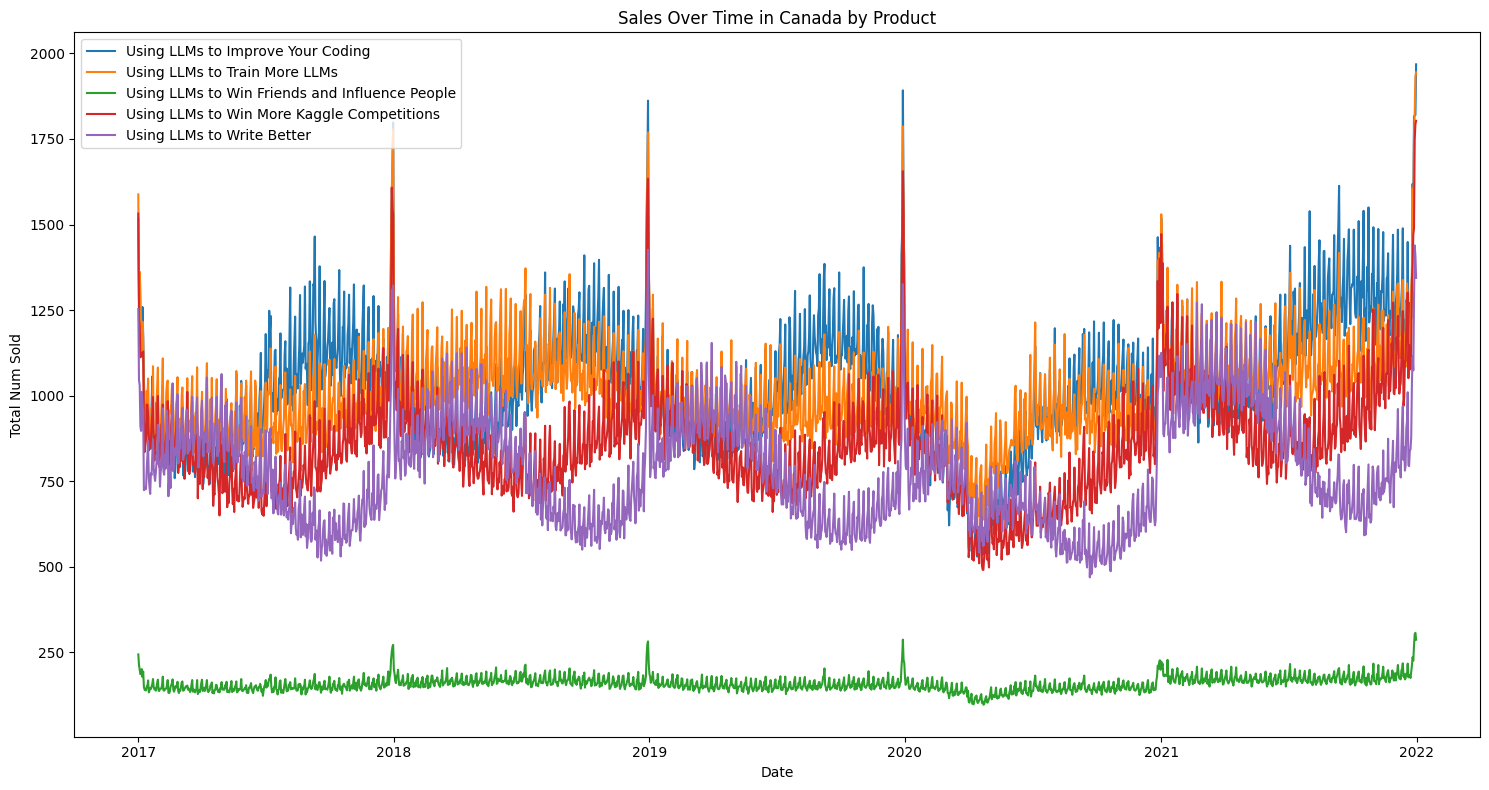

In [16]:
# Create a new DataFrame that aggregates num_sold by date, product, and country
agg_num_sold_time = df_train.groupby(['date', 'product', 'country'], as_index=False)['num_sold'].sum()

country = 'Canada' # 'Argentina' 'Canada' 'Estonia' 'Japan' 'Spain'
country_df = agg_num_sold_time[agg_num_sold_time['country'] == country]

# Plot the data for this country
plt.figure(figsize=(15, 8))

for product in country_df['product'].unique():
    product_df = country_df[country_df['product'] == product]
    plt.plot(product_df['date'], product_df['num_sold'], label=product)

plt.title(f'Sales Over Time in {country} by Product')
plt.xlabel('Date')
plt.ylabel('Total Num Sold')
plt.legend()

plt.tight_layout()
plt.show()

**Time Series Line Graph Insights**

> **Key Observations:**  
> Looking at the time series line graphs shows two important patterns:
> 
> 1. **Sales Spikes Across All Countries:**  
> There are clear spikes in sales data in all countries. These spikes suggest there might be seasonal patterns in sales, which need more study to understand why they happen.
> 
> 2. **Country-Specific Cyclicality:**  
> While all countries have cycles in sales, the pattern of these cycles is different for each country. For example, Japan has sales spikes at different times compared to other countries, showing unique market behavior.

## 🔧 Modelling

In [17]:
from losses import smape, rmsle
from modelling import iterative_forecasting, optimize_lgbm
from data_processing import generate_features, split_data

In [18]:
# Using a Function for Feature generation
df_features = generate_features(df_train)

# Using a Function for Data Splitting
X_train, X_val, y_train, y_val, val_mask = split_data(df_features, validation_days=84)

In [19]:
# Finding optimal Hyperparameters
model = optimize_lgbm(X_train, y_train, n_trials=50)

[I 2024-07-02 19:39:21,774] A new study created in memory with name: no-name-feab6473-fe93-4d65-896c-86496d381c3c
[I 2024-07-02 19:39:24,134] Trial 0 finished with value: 14.809370607782403 and parameters: {'n_estimators': 175, 'learning_rate': 0.28767857660247903, 'max_depth': 8}. Best is trial 0 with value: 14.809370607782403.
[I 2024-07-02 19:39:26,529] Trial 1 finished with value: 23.821559802298797 and parameters: {'n_estimators': 220, 'learning_rate': 0.08900466011060913, 'max_depth': 4}. Best is trial 0 with value: 14.809370607782403.
[I 2024-07-02 19:39:28,184] Trial 2 finished with value: 16.073435559579465 and parameters: {'n_estimators': 111, 'learning_rate': 0.2665440364437338, 'max_depth': 7}. Best is trial 0 with value: 14.809370607782403.
[I 2024-07-02 19:39:31,757] Trial 3 finished with value: 13.548633082320892 and parameters: {'n_estimators': 242, 'learning_rate': 0.055146123573950614, 'max_depth': 10}. Best is trial 3 with value: 13.548633082320892.
[I 2024-07-02 19:

In [20]:
# Fit the model
model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1870
[LightGBM] [Info] Number of data points in the train set: 130650, number of used features: 23
[LightGBM] [Info] Start training from score 164.432591


LGBMRegressor(learning_rate=0.17017436700726468, max_depth=9, n_estimators=225,
              random_state=42)

In [21]:
# Iteratively making Predictions for each selected period
df_forecast = iterative_forecasting(model, X_train, y_train, X_val, val_mask, df_features)
df_forecast[['date', 'num_sold', 'forecast']].head(3)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013949 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1870
[LightGBM] [Info] Number of data points in the train set: 130650, number of used features: 23
[LightGBM] [Info] Start training from score 164.432591


,date,num_sold,forecast
130703,2021-10-09,150,150.939093
130702,2021-10-09,25,27.950497
130701,2021-10-09,164,166.442579


In [22]:
# Calculate Mertics values
true_values = df_forecast['num_sold'].values
forecasted_values = np.maximum(df_forecast['forecast'].values, 0)

# SMAPE
smape_value = smape(true_values, forecasted_values)
print(f"SMAPE: {smape_value:.2f}%")

# RMSLE
rmsle_value = rmsle(true_values, forecasted_values)
print(f"RMSLE: {rmsle_value:.4f}")

SMAPE: 11.28%
RMSLE: 0.2128


 **Model Performance and Potential Improvements**

We trained a `LGBMRegressor` model on the data, using cross-validation to tune the hyperparameters. The SMAPE of the model on the validation data is **11.28%** and RMSLE is **0.2128**.

> **These metrics can still be improved. Examples of improvements include:**
> - Modeling each country separately
> - Creating new features
> - Experimenting with different algorithms


## 🔍 Feature Selection and Optimization

Here, we can **select the necessary features** and then **apply the `optimize_lgbm` function again** on the chosen dataset.

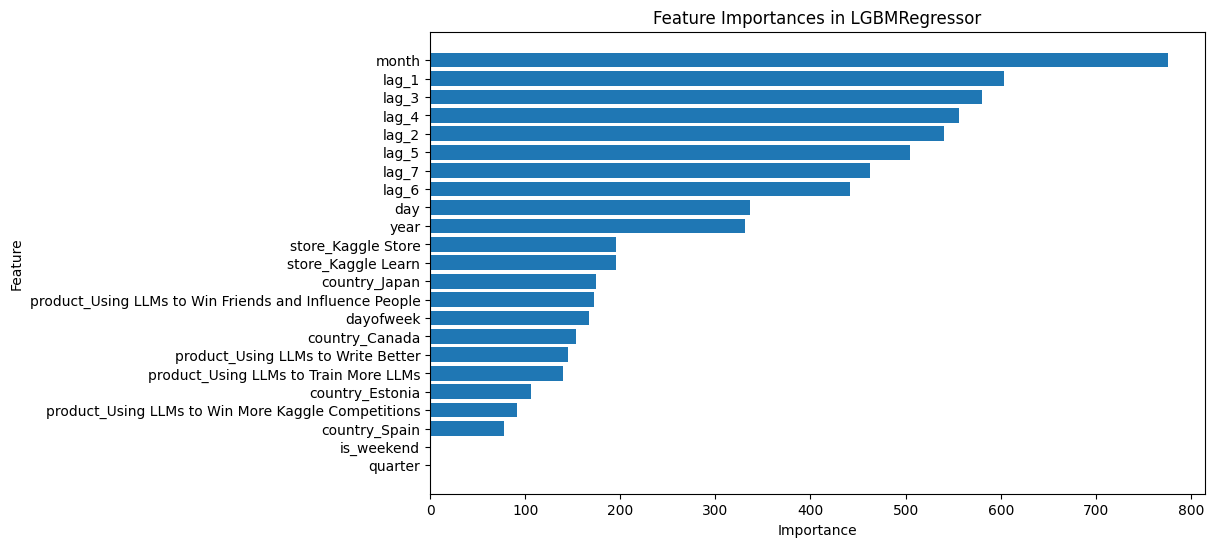

In [10]:
importances = model.feature_importances_
feature_names = X_train.columns

# Визуализация важности признаков
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in LGBMRegressor')
plt.gca().invert_yaxis()
plt.show()

## 📊 Results Visualization

Mean Delta: 7.2731217963867145



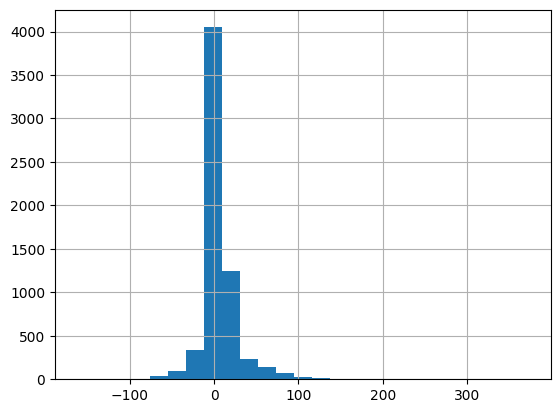

In [11]:
df_forecast['delta'] = df_forecast['num_sold'] - df_forecast['forecast']
print('Mean Delta:', df_forecast['delta'].mean())
print()
df_forecast['delta'].hist(bins=25)
plt.show()

In [15]:
print(countries)
print(products)
print(stores)

['Argentina' 'Canada' 'Estonia' 'Japan' 'Spain']
['Using LLMs to Improve Your Coding' 'Using LLMs to Train More LLMs'
 'Using LLMs to Win Friends and Influence People'
 'Using LLMs to Win More Kaggle Competitions' 'Using LLMs to Write Better']
['Kaggle Learn' 'Kaggle Store' 'Kagglazon']


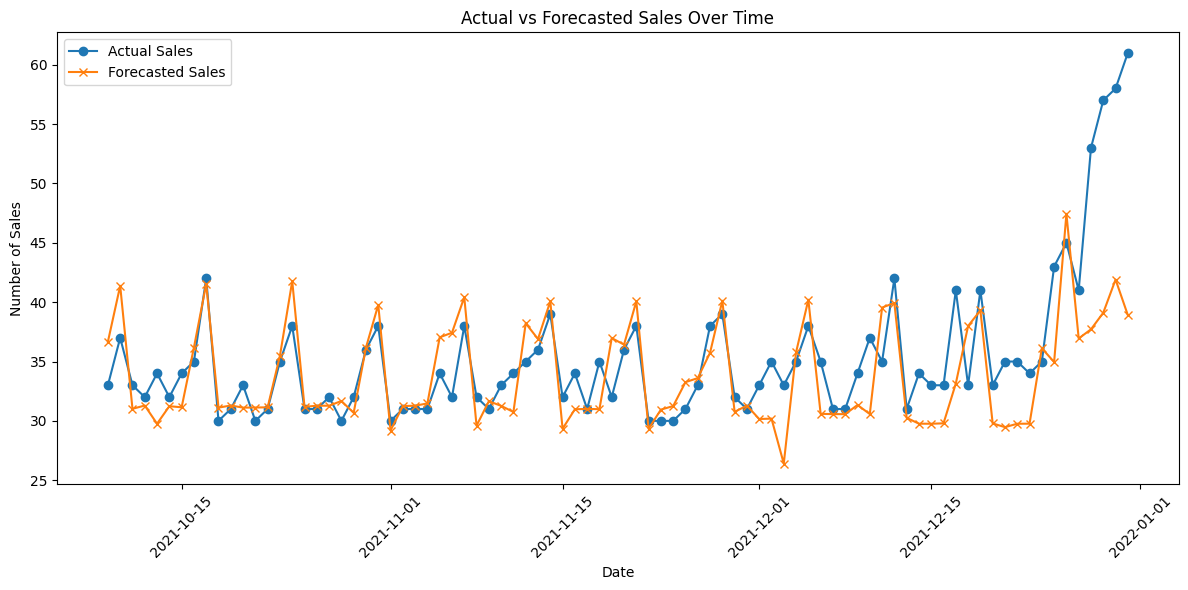

In [16]:
cntr = 'Canada'
prdct = 'Using LLMs to Win Friends and Influence People'
str_ = 'Kaggle Store'

df_smpl = df_forecast[df_forecast['country_'+cntr] == 1]
df_smpl = df_smpl[df_smpl['product_'+prdct] == 1]
df_smpl = df_smpl[df_smpl['store_'+str_] == 1]

plt.figure(figsize=(12, 6))

plt.plot(df_smpl['date'], df_smpl['num_sold'], label='Actual Sales', marker='o')

plt.plot(df_smpl['date'], df_smpl['forecast'], label='Forecasted Sales', marker='x')

plt.title('Actual vs Forecasted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')

plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()